T5 DQ2

Linear regression is a powerful tool for modeling relationships between variables in a dataset. However, there are limitations to linear regression that may result in biased or inaccurate predictions. Discuss at least two common assumptions of linear regression models and the potential consequences of violating these assumptions. How can Python be used to diagnose and address violations of these assumptions in a linear regression model? Provide at least one example of a linear regression model that violates one of these assumptions and how it can be improved.

In [98]:
#importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression
from scipy.stats import iqr

In [99]:
#reading csv file
df = pd.read_csv('scrap price.csv')
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [100]:
df.describe(include='all')

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [101]:
df.isnull().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [102]:
df=df.drop('ID',axis=1)
df

,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [103]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [104]:
df.name.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [108]:
df.columns

Index(['symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

Outliers 

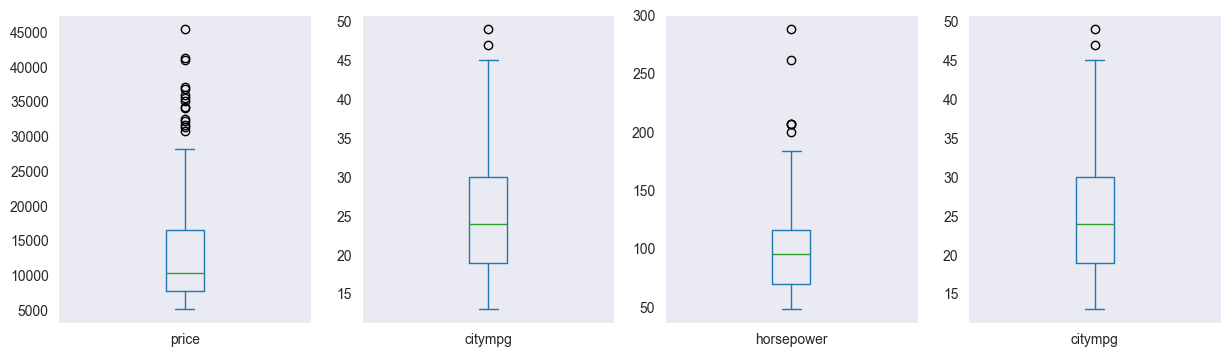

In [109]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
df.price.plot(kind='box')
plt.subplot(1,4,2)
df.citympg.plot(kind='box')
plt.subplot(1,4,3)
df.horsepower.plot(kind='box')
plt.subplot(1,4,4)
df.citympg.plot(kind='box')
plt.show()

In [110]:
def find_outliers_IQR(df):
    q1= df.quartile(0.25)
    q3=df.quartile(0.75)
    IQR=q3-q1
    data= df[((df<(q1 -1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]
    

In [111]:
data

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,volvo,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,volvo,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


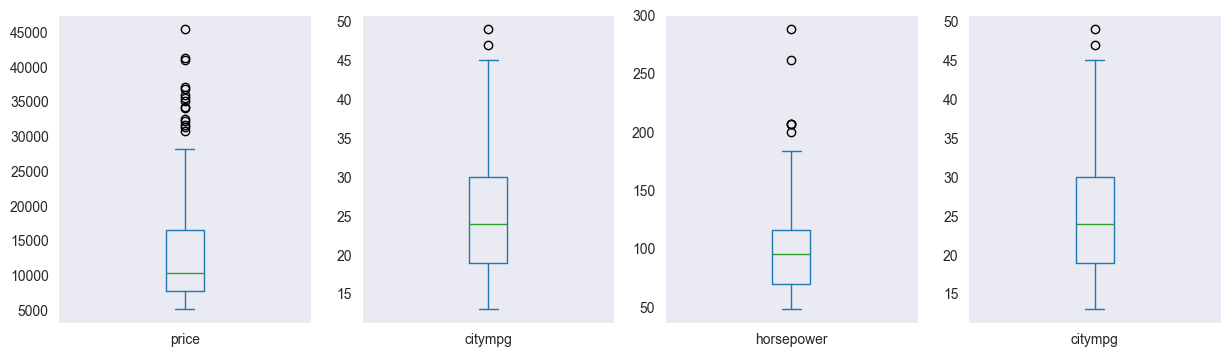

In [112]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
data.price.plot(kind='box')
plt.subplot(1,4,2)
data.citympg.plot(kind='box')
plt.subplot(1,4,3)
data.horsepower.plot(kind='box')
plt.subplot(1,4,4)
data.citympg.plot(kind='box')
plt.show()

Some Graphs and Vizulations

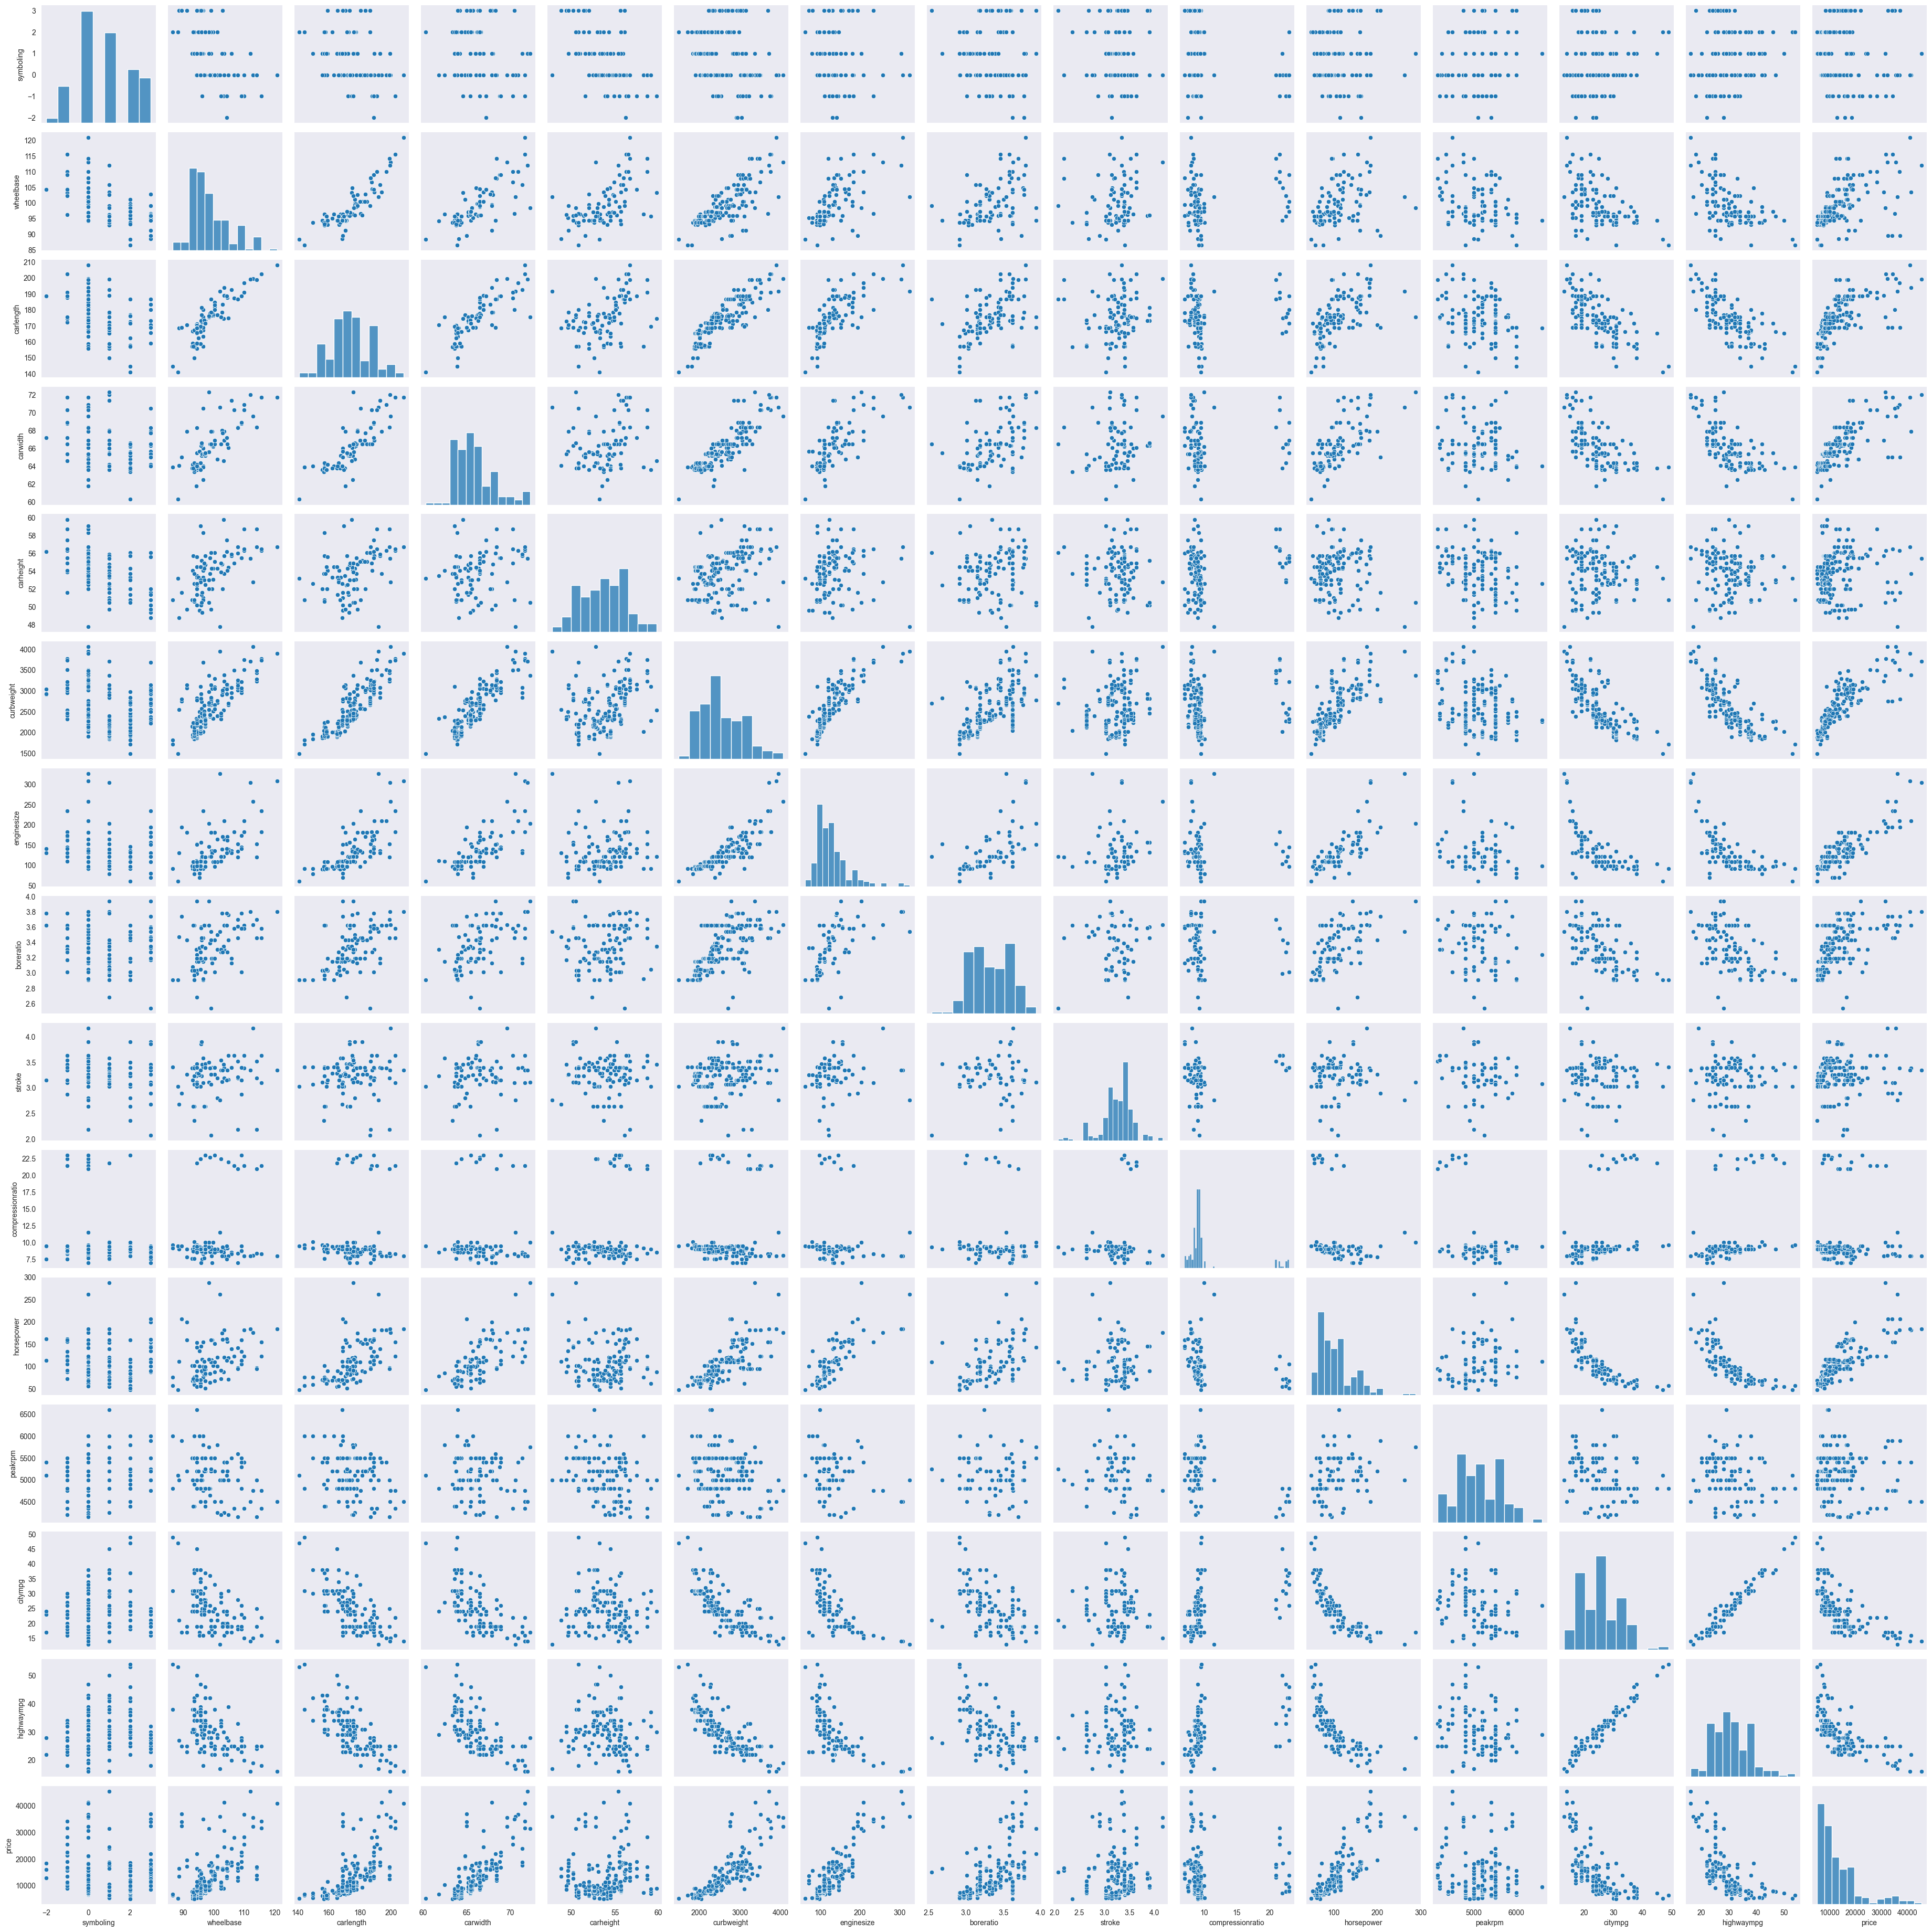

In [118]:
sns.pairplot(data)

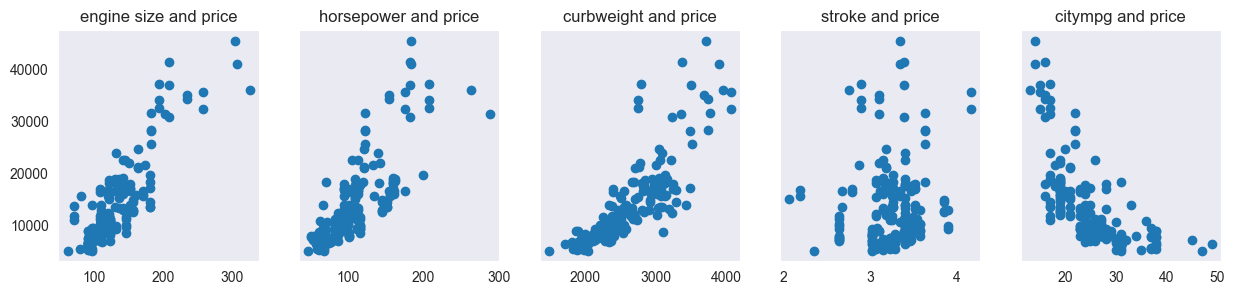

In [120]:
f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1, 5, sharey=True, figsize =(15,3)) 
ax1.scatter(data['enginesize'],data['price'])
ax1.set_title('engine size and price')
ax2.scatter(data['horsepower'],data['price'])
ax2.set_title('horsepower and price')
ax3.scatter(data['curbweight'],data['price'])
ax3.set_title('curbweight and price')
ax4.scatter(data['stroke'],data['price'])
ax4.set_title('stroke and price')
ax5.scatter(data['citympg'],data['price'])
ax5.set_title('citympg and price')

plt.show()

<Axes: xlabel='enginelocation'>

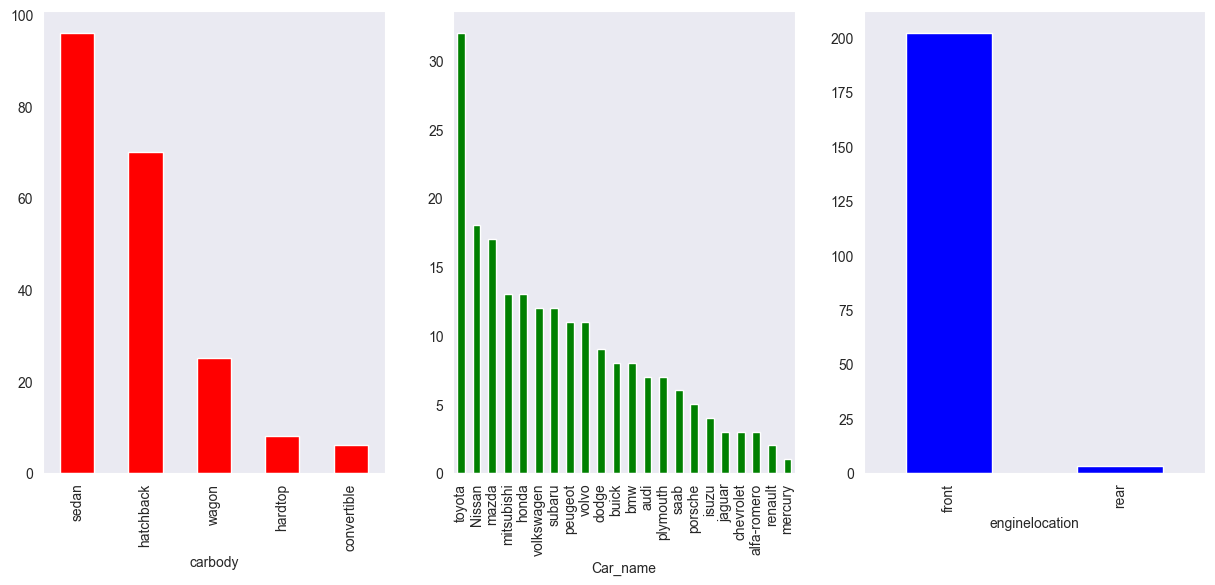

In [122]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
data.carbody.value_counts().plot(kind='bar',color='r')
plt.subplot(1,3,2)
data.Car_name.value_counts().plot(kind='bar',color='g')
plt.subplot(1,3,3)
data.enginelocation.value_counts().plot(kind='bar',color='b')

Normalize

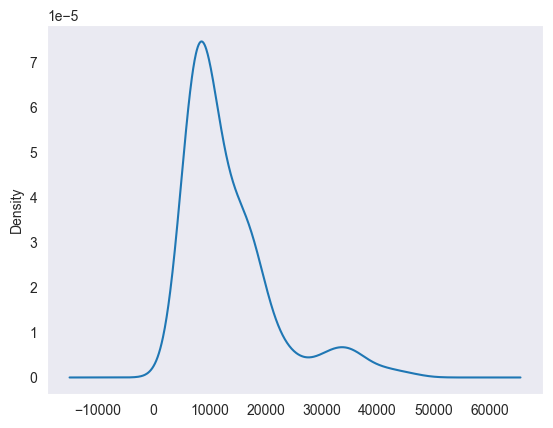

In [123]:
#Our dependent values(y) are price 
data.price.plot.density()
plt.show()

In [124]:
log_price = np.log(data['price'])

# Then we add it to our data frame
data['log_price'] = log_price

In [125]:
data_normal=data.drop(['price'],axis=1)
data_normal

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,log_price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510075
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711116
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711116
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543235
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,volvo,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,9.731809
201,-1,gas,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,9.854560
202,-1,gas,volvo,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,9.975110
203,-1,diesel,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,10.019936


<Axes: ylabel='Density'>

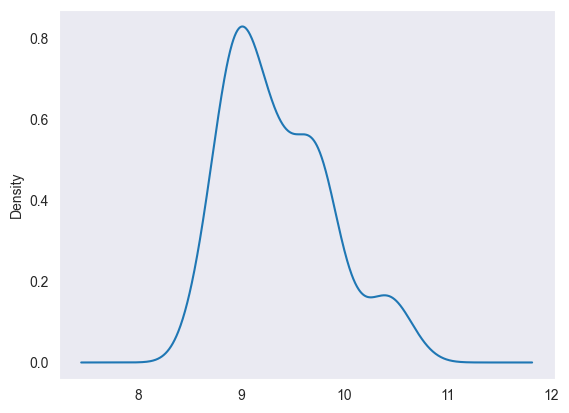

In [126]:
data.log_price.plot.density()

<Axes: >

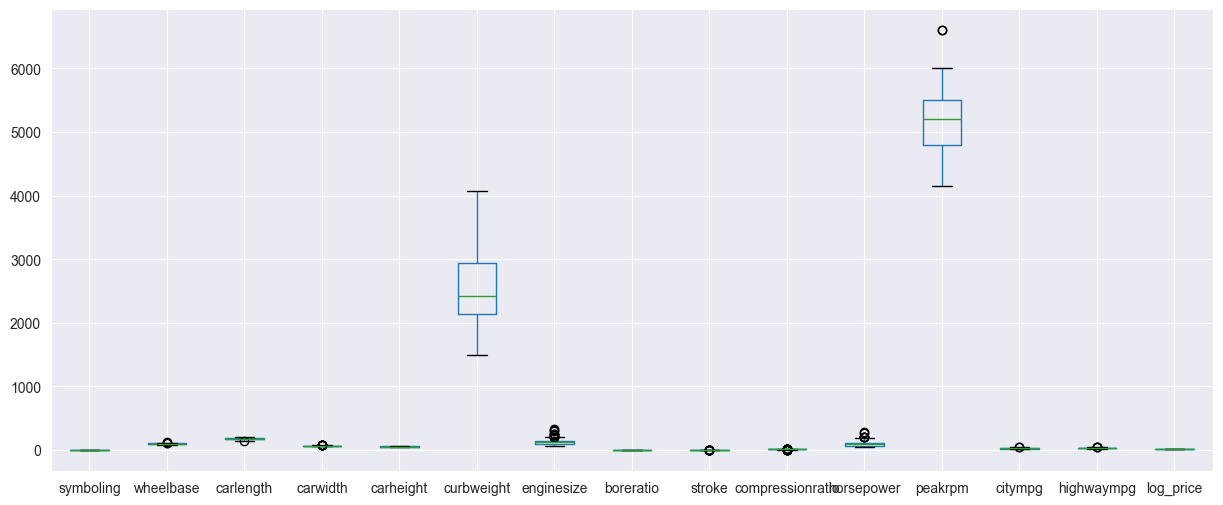

In [127]:
plt.figure(figsize=(15,6))
data_normal.boxplot()

Multicollinerarity

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_normal[['symboling', 'carheight', 'curbweight',
        'enginesize',  'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg']]


# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,1.905470,symboling
1,545.200272,carheight
2,265.621081,curbweight
3,67.727203,enginesize
4,241.141719,boreratio
5,113.032643,stroke
6,15.669971,compressionratio
7,55.221642,horsepower
8,175.174701,peakrpm
9,73.410624,citympg


In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_normal[['symboling',
       'horsepower', 'citympg']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,1.459761,symboling
1,3.439882,horsepower
2,3.388769,citympg


In [130]:
data_multi=data_normal.drop(['carheight','compressionratio','boreratio','stroke','curbweight','peakrpm','enginesize'],axis=1)
data_multi

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,enginetype,cylindernumber,fuelsystem,horsepower,citympg,highwaympg,log_price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,dohc,four,mpfi,111,21,27,9.510075
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,dohc,four,mpfi,111,21,27,9.711116
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,ohcv,six,mpfi,154,19,26,9.711116
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,ohc,four,mpfi,102,24,30,9.543235
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,ohc,five,mpfi,115,18,22,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,volvo,std,four,sedan,rwd,front,109.1,188.8,68.9,ohc,four,mpfi,114,23,28,9.731809
201,-1,gas,volvo,turbo,four,sedan,rwd,front,109.1,188.8,68.8,ohc,four,mpfi,160,19,25,9.854560
202,-1,gas,volvo,std,four,sedan,rwd,front,109.1,188.8,68.9,ohcv,six,mpfi,134,18,23,9.975110
203,-1,diesel,volvo,turbo,four,sedan,rwd,front,109.1,188.8,68.9,ohc,six,idi,106,26,27,10.019936
